In [159]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import log
import seaborn as sns
import pydotplus
import graphviz
X,y=datasets.make_circles(n_samples=12000,noise=0.2)
y=np.array(list(map(lambda x:1 if x==1 else -1,y)))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

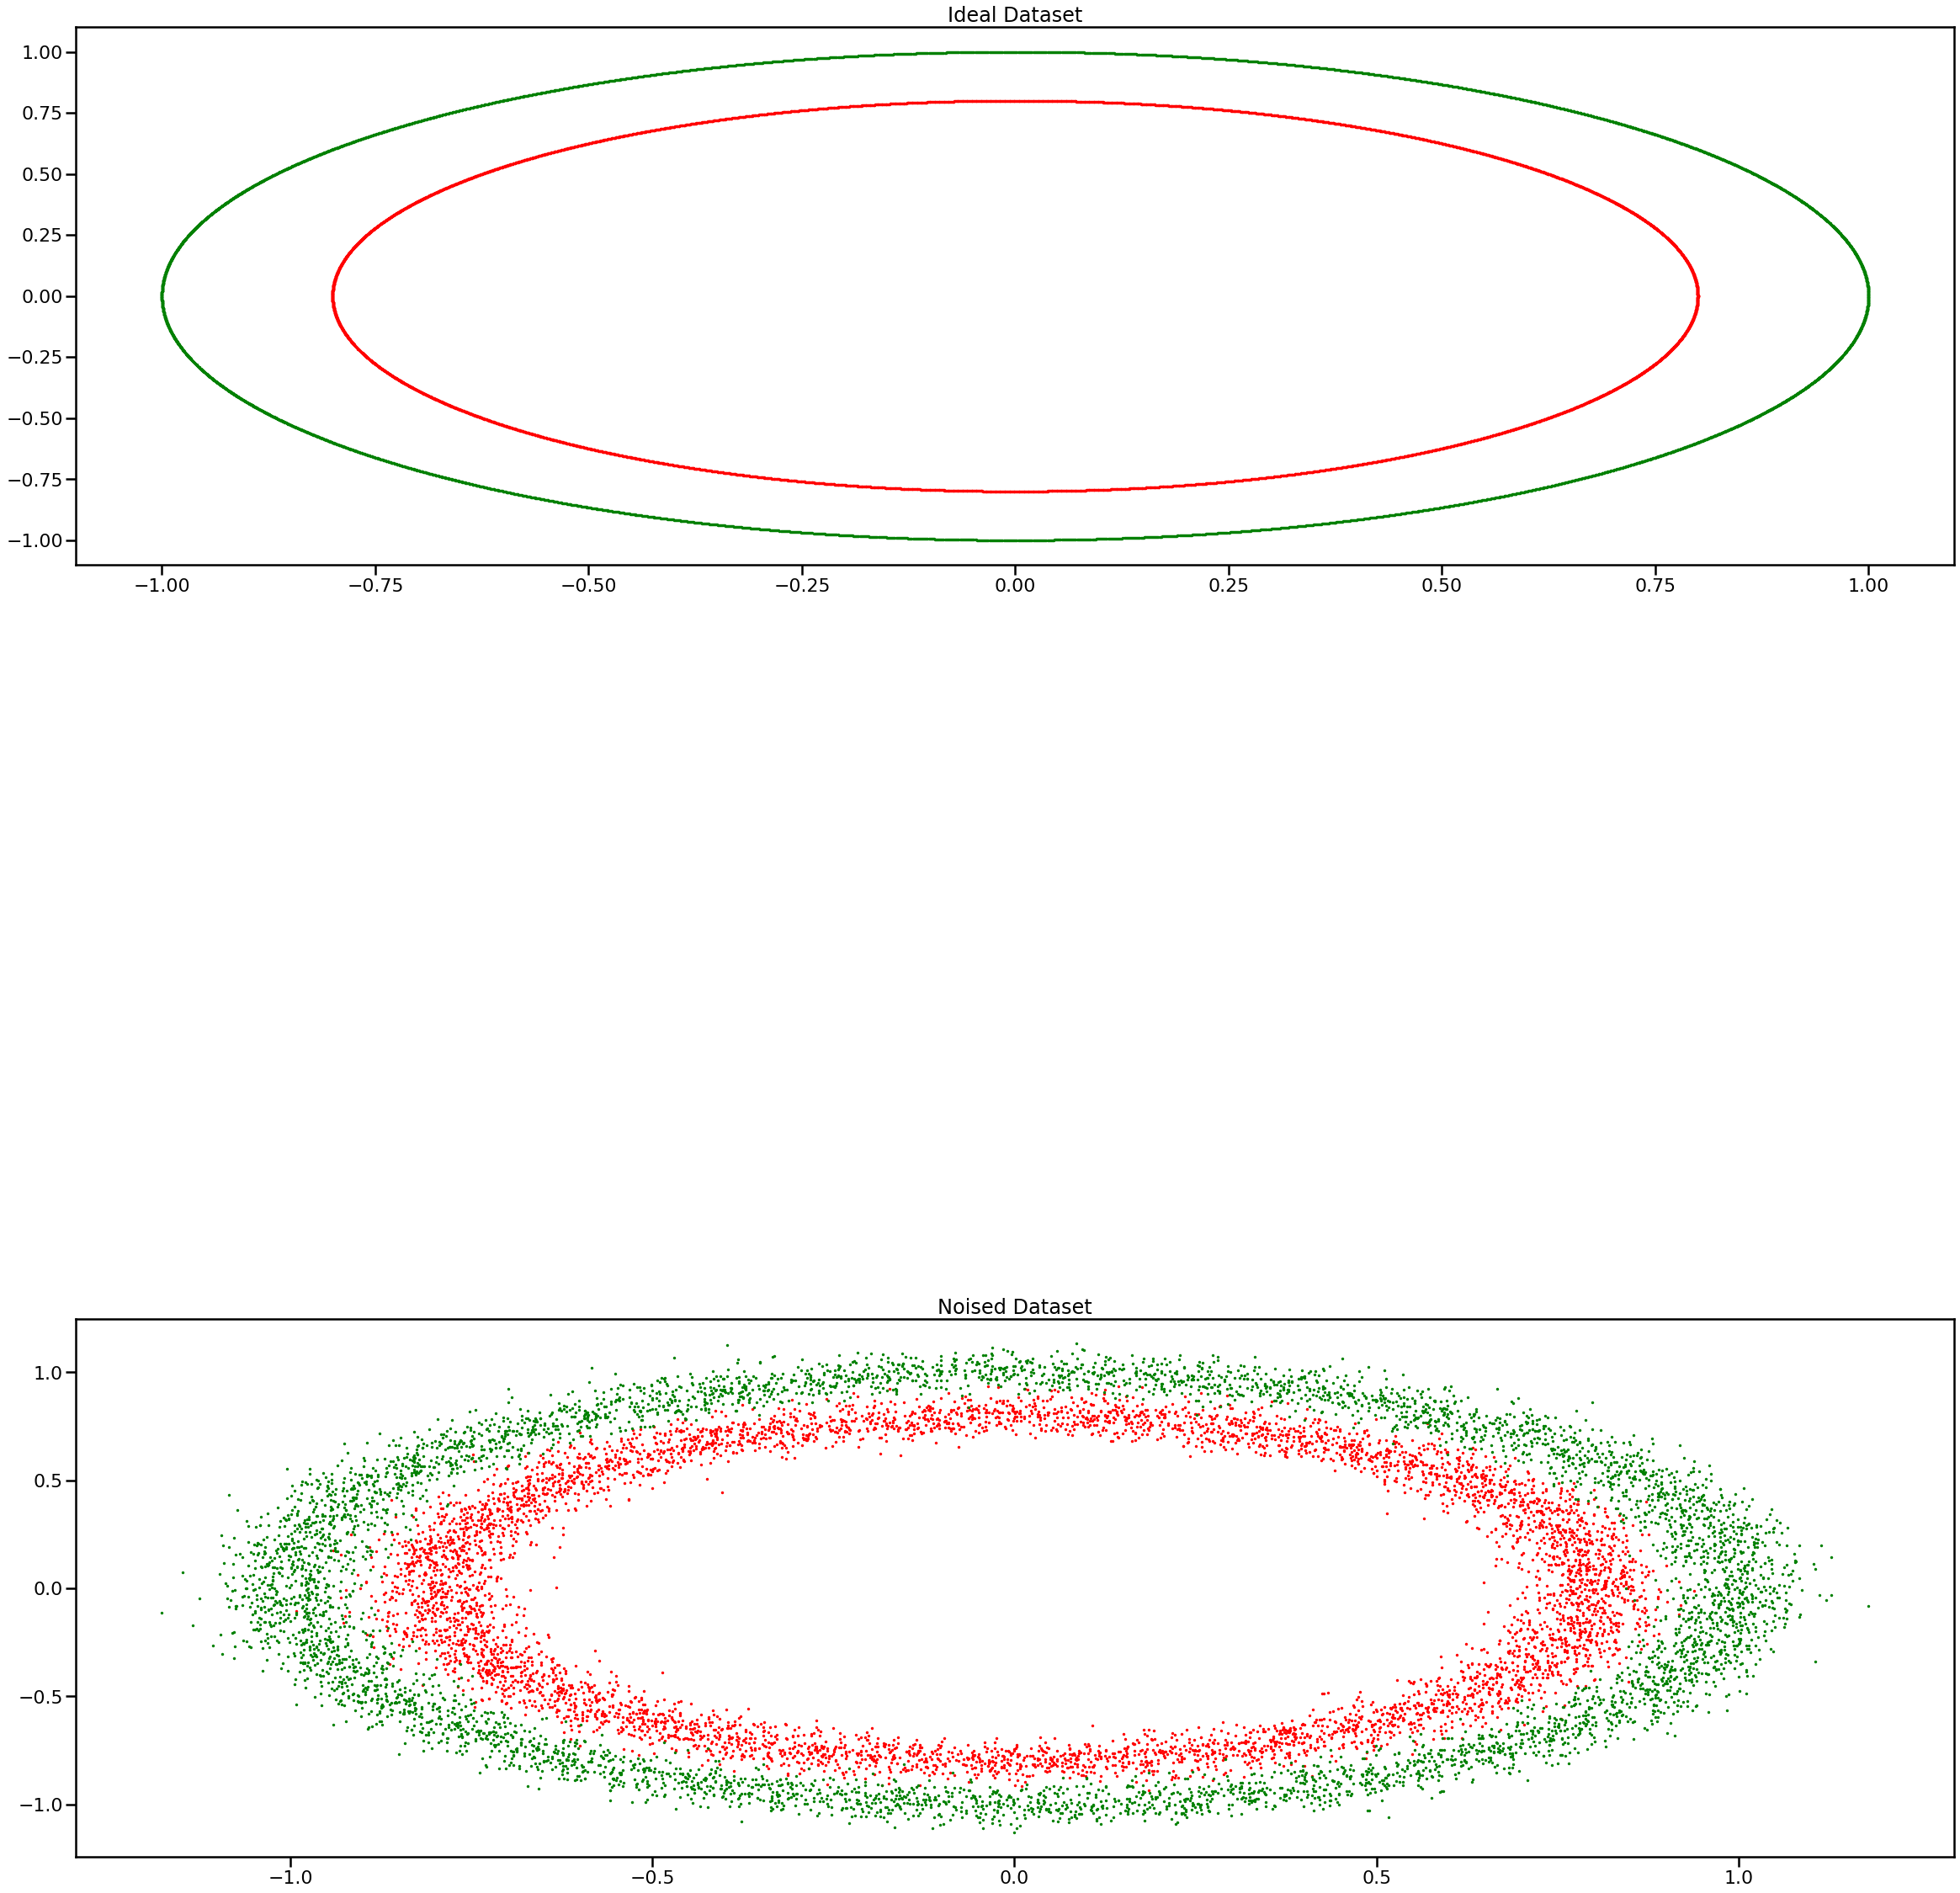

In [160]:
X,y=datasets.make_circles(n_samples=12000,noise=0)
y=np.array(list(map(lambda x:1 if x==1 else -1,y)))
plt.subplot(311)
plt.title("Ideal Dataset")
plt.scatter(X[y==1,0],X[y==1,1],c='r',s=2)
plt.scatter(X[y==-1,0],X[y==-1,1],c='g',s=2)
X,y=datasets.make_circles(n_samples=12000,noise=0.05)
y=np.array(list(map(lambda x:1 if x==1 else -1,y)))
plt.subplot(313)
plt.title("Noised Dataset")
plt.scatter(X[y==1,0],X[y==1,1],c='r',s=2)
plt.scatter(X[y==-1,0],X[y==-1,1],c='g',s=2)

In [194]:
class AdaBoost():
    '''Written By YU Zongxi'''
    
    def __init__(self,clf=None,n_estimators=50,learning_rate=1):
        # If not specify estimator
        if clf==None:
            
            self.clf=[DecisionTreeClassifier(max_depth=1,min_samples_leaf=1) for i in range(n_estimators)]
        else:
            clf=[clf for i in range(n_estimators)]
        self.n_estimators=n_estimators
        self.learning_rate=1
        self.a=[]
    def __repr__(self):
        return "AdaBoost"
    
    def __getitem__(self, n):
        return self.clf[n]
    
    def __len__(self):
        return len(self.clf)
    
    def fit(self,X_train,y_train):
        
        
        # Initilize weight
        self.weight=np.ones((np.shape(X_train)[0]))/np.shape(X_train)[0]
        for i in range(self.n_estimators):
            
            # Use the weighted traininng set to train
            self.clf[i].fit(X_train,y_train,self.weight)
            
            # Calculate error rate on each
            error_rate=np.sum(self.weight*(self.clf[i].predict(X_train)!=y_train))
            
            # Calculate the a
            a=1/2*log((1-error_rate)/error_rate)
            self.a.append(self.learning_rate*a)
            
            # Update weight
            self.weight=self.weight/np.sum(self.weight*np.exp(-a*y_train*self.clf[i].predict(X_train)))*np.exp(-a*y_train*self.clf[i].predict(X_train))
            
        return self
    
    def predict(self,X):
        result=np.zeros((len(X)))
        for i in range(len(self.a)):
            result+=self.a[i]*self.clf[i].predict(X)
        return np.sign(result).astype(int)
    
    def accuracy(self,X,y):
        from sklearn.metrics import accuracy_score
        return accuracy_score(y,self.predict(X))
    
    def get_accuracy(self,i,X,y):
        from sklearn.metrics import accuracy_score
        return accuracy_score(y,self.clf[i].predict(X))  

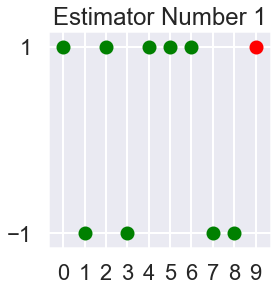

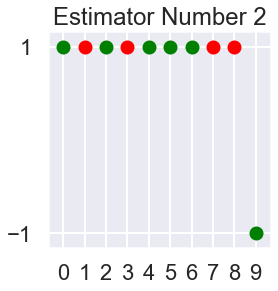

In [231]:
plt.rcParams['figure.figsize']=4,4
test=[]
train=[]
clf=AdaBoost(n_estimators=100,learning_rate=1)
clf.fit(X_train[:10],y_train[:10])
plt.figure()
z=clf[0].predict(X_train[:10])==y_train[:10]
plt.yticks([-1,1])
plt.xticks(np.arange(0,10,1))
plt.scatter(np.array(range(0,10))[z],clf[0].predict(X_train[:10])[z],c='g')
plt.scatter(np.array(range(0,10))[np.logical_not(z)],clf[0].predict(X_train[:10])[np.logical_not(z)],c='r')
plt.title("Estimator Number 1")
plt.figure()
plt.yticks([-1,1])
plt.xticks(np.arange(0,10,1))
plt.title("Estimator Number 2")
z=clf[1].predict(X_train[:10])==y_train[:10]
plt.scatter(np.array(range(0,10))[z],clf[1].predict(X_train[:10])[z],c='g')
plt.scatter(np.array(range(0,10))[np.logical_not(z)],clf[1].predict(X_train[:10])[np.logical_not(z)],c='r')

Text(0, 0.5, 'Accuracy')

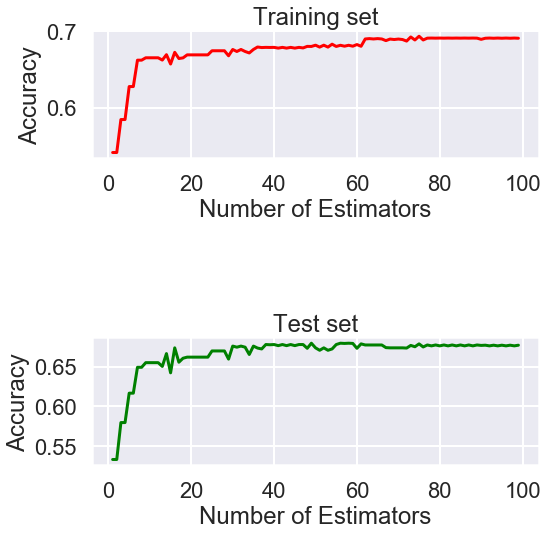

In [198]:
plt.rcParams['figure.figsize']=8,8
test=[]
train=[]
for i in range(1,100):
    clf=AdaBoost(n_estimators=i,learning_rate=1)
    clf.fit(X_train,y_train)
    test.append(clf.accuracy(X_test,y_test))
    train.append(clf.accuracy(X_train,y_train))
    
plt.subplot(311)
plt.title("Training set")
plt.plot(range(1,100),train,color='r')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.subplot(313)
plt.title("Test set")
plt.plot(range(1,100),test,color='g')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")


In [195]:
clf=AdaBoost(n_estimators=100,learning_rate=1)
clf.fit(X_train,y_train)

AdaBoost

In [168]:
test=[]
train=[]
for i in range(100):
    test.append(clf.get_accuracy(i,X_test,y_test))
    train.append(clf.get_accuracy(i,X_train,y_train))

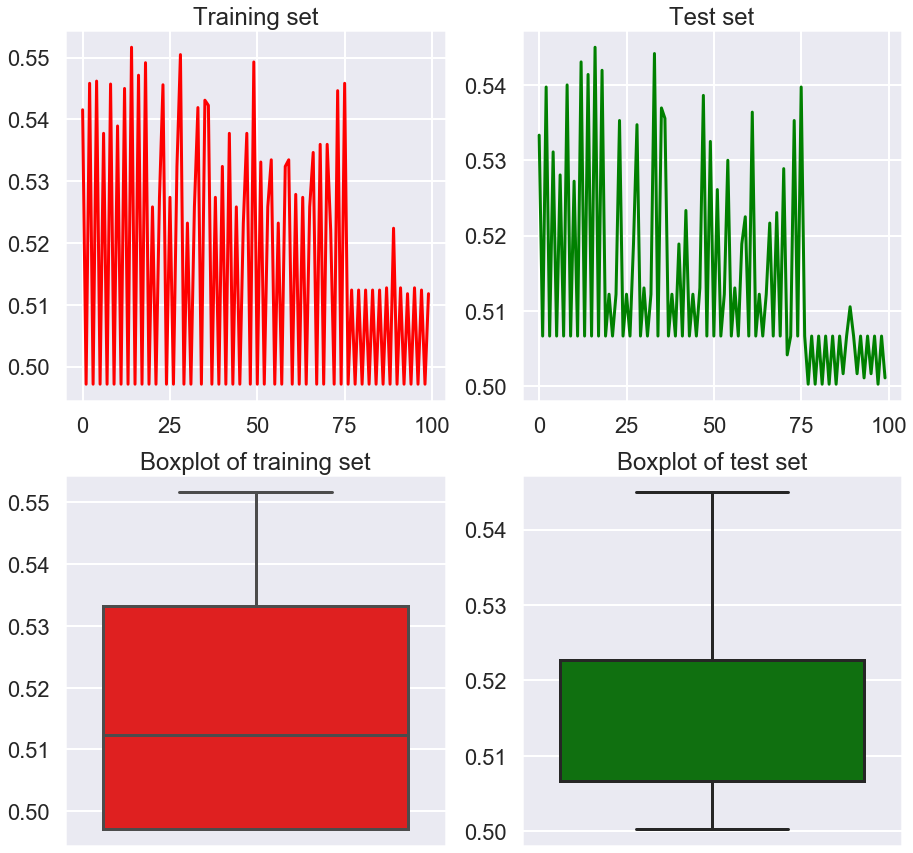

In [186]:
plt.rcParams['figure.figsize']=15,15
with sns.axes_style("darkgrid"):
    sns.set_context("poster")
    
    plt.subplot(221)
    plt.title("Training set")
    plt.plot(train,color='r')

    plt.subplot(222)
    plt.title("Test set")
    plt.plot(test,color='g')

    plt.subplot(223)
    plt.title("Boxplot of training set")
    sns.boxplot(train,color='r',orient='v')

    plt.subplot(224)
    plt.title("Boxplot of test set")
    sns.boxplot(test,color='g',orient='v')

In [183]:
?sns.boxplot

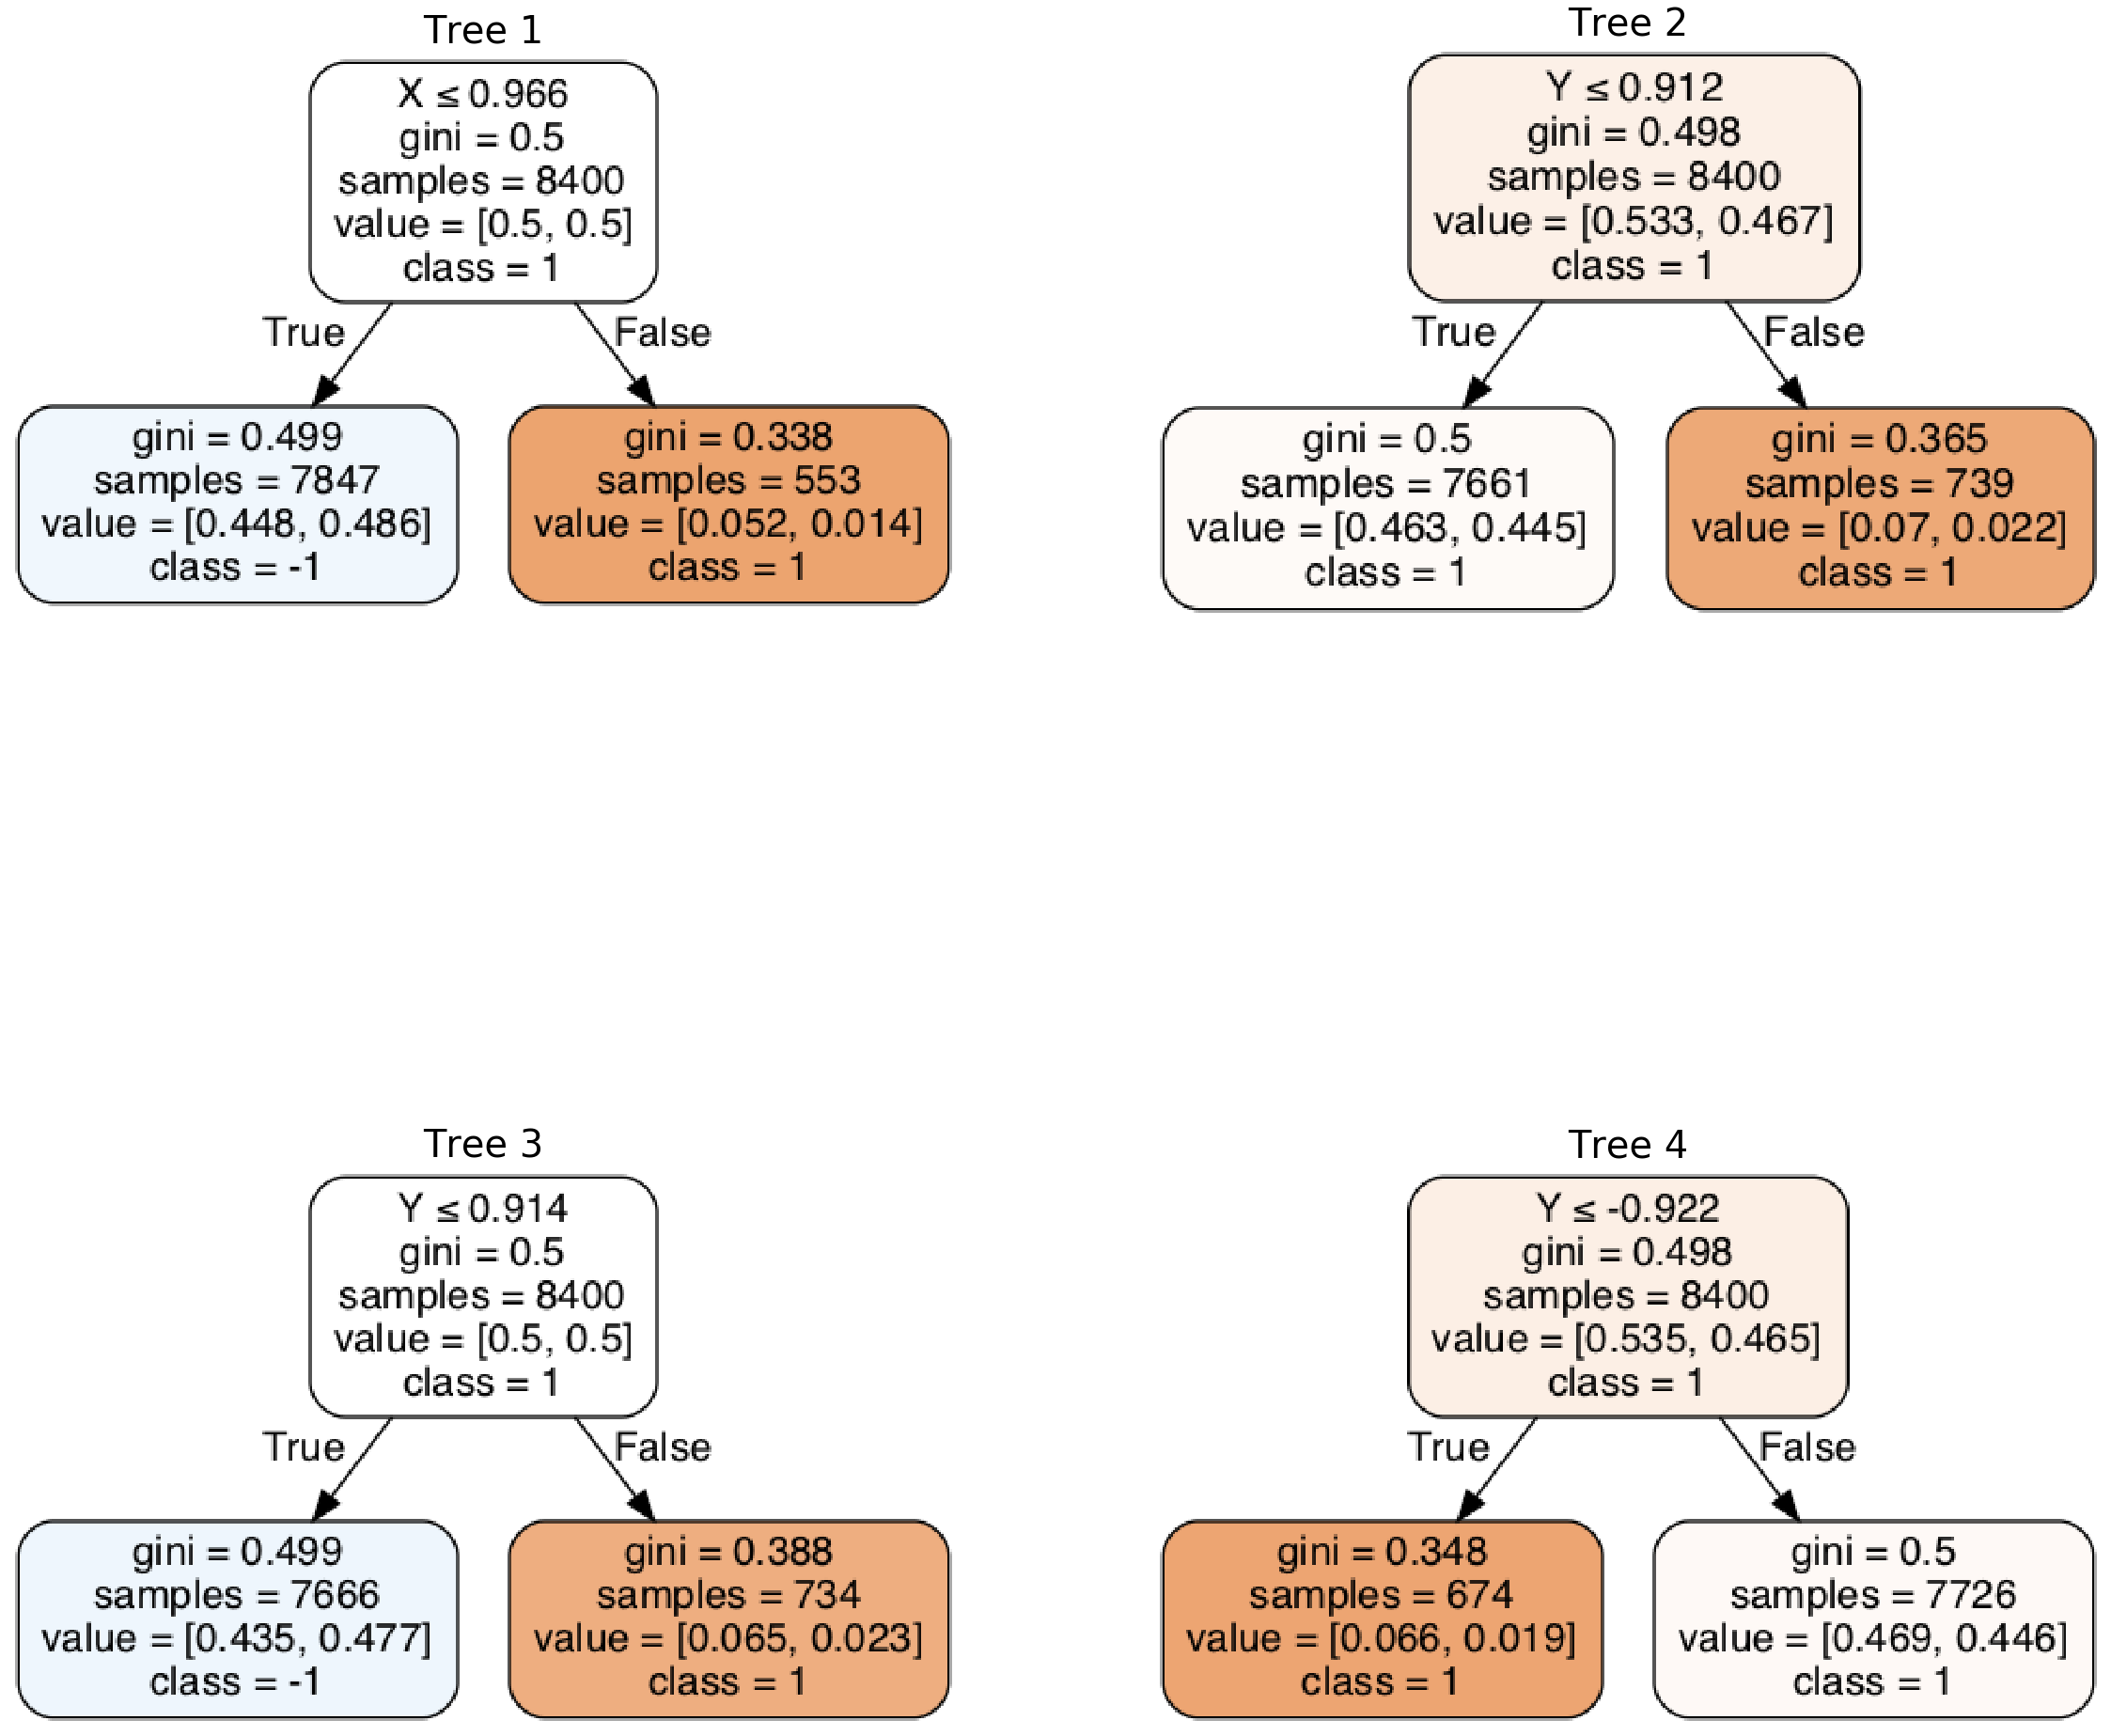

In [131]:
for i in range(4):
    dot_data = tree.export_graphviz(clf[i], out_file=None,\
                            feature_names=["X","Y"],\
                             class_names=["1","-1"],\
                             filled=True, rounded=True,\
                             special_characters=True)
    graph=pydotplus.graph_from_dot_data(dot_data)

    with open(str(i)+'.png', 'wb') as f:
        f.write(graph.create_png())
from PIL import Image
for i in range(4):
    plt.rcParams['figure.figsize']=40,40
    sns.set_context('poster')
    plt.subplot("22"+str(i+1))
    plt.axis('off')
    plt.title('Tree '+str(i+1),fontsize=40)
    plt.imshow(Image.open(str(i)+".png"))
plt.savefig('1.png')

In [ ]:
test_result=[]
train_result=[]

for i in range(0,40):   
    clf=AdaBoost(n_estimators=i,learning_rate=1)
    clf.fit(X_train,y_train,X_test=X_test,y_test=y_test)
    test_result.append(clf.accuracy(X_test,y_test))
    train_result.append(clf.accuracy(X_train,y_train))


In [154]:
??DecisionTreeClassifier

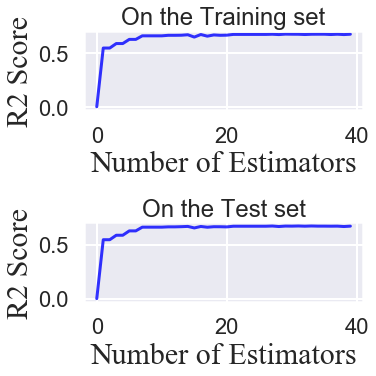

In [53]:
import seaborn as sns

font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 30,
}

with sns.axes_style('darkgrid'):
    sns.set_context('poster')
    
    plt.grid(color = 'red', linestyle=':', linewidth=1)
    plt.subplot(311)
    plt.plot(train_result,color='blue',alpha=0.8, )
    plt.xlabel("Number of Estimators",font)
    plt.ylabel("R2 Score",font)

    plt.title("On the Training set")
    
    plt.subplot(313)
    plt.plot(test_result,color='blue',alpha=0.8 )
    plt.xlabel("Number of Estimators",font)
    plt.ylabel("R2 Score",font)
    
    plt.title("On the Test set")
    plt.show()

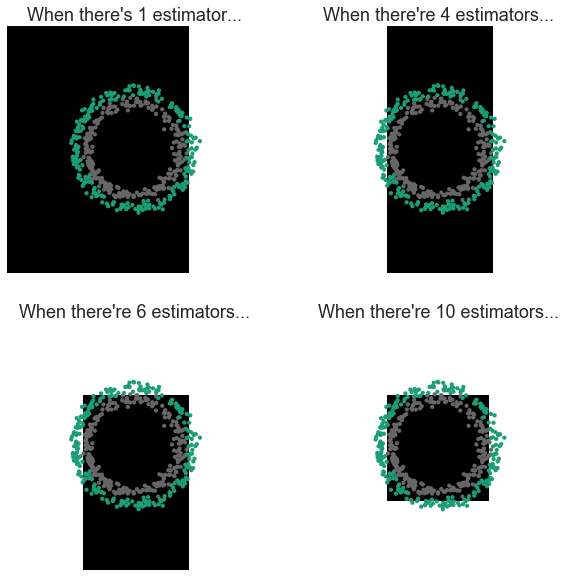

In [252]:
sns.set_context("poster")
plt.rcParams['figure.figsize']=10,10

clf=AdaBoost(n_estimators=1,learning_rate=1)
clf.fit(X_train,y_train)
plt.subplot(221)

# From the Internet
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.gray_r)
plt.scatter(X[:500, 0], X[:500, 1], c=y[:500], cmap=plt.cm.Dark2,s=5)
plt.title("When there's 1 estimator...",fontsize=18)


clf=AdaBoost(n_estimators=4,learning_rate=1)
clf.fit(X_train,y_train)
plt.axis('off')
plt.subplot(222)
plt.axis('off')

# From the Internet
plt.title("When there're 4 estimators...",fontsize=18)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.gray_r)
plt.scatter(X[:500, 0], X[:500, 1], c=y[:500], cmap=plt.cm.Dark2,s=5)



clf=AdaBoost(n_estimators=6,learning_rate=1)
clf.fit(X_train,y_train)
plt.subplot(223)
plt.axis('off')

# From the Internet
plt.title("When there're 6 estimators...",fontsize=18)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.gray_r)
plt.scatter(X[:500, 0], X[:500, 1], c=y[:500], cmap=plt.cm.Dark2,s=5)

clf=AdaBoost(n_estimators=10,learning_rate=1)
clf.fit(X_train,y_train)
plt.subplot(224)
plt.axis('off')
plt.grid(color = 'gray', linestyle=':', linewidth=1)
# From the Internet
plt.title("When there're 10 estimators...",fontsize=18)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.gray_r)
plt.scatter(X[:500, 0], X[:500, 1], c=y[:500], cmap=plt.cm.Dark2,s=5)

plt.show()